### **STATSMODELS REGRESSION**
Statsmodels es una biblioteca de Python que proporciona clases y funciones para realizar análisis estadísticos y estimaciones de modelos, incluidos modelos de regresión. En particular, Statsmodels incluye una clase llamada OLS (Ordinary Least Squares) que se utiliza para realizar regresiones lineales.

### **CHALLENGE 1**
**I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:**


Trabajo en una academia de programación y he desarrollado la teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para poner a prueba mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

**Use this command to create a dataframe with the data provided in the table.**

Para crear un DataFrame con los datos proporcionados, puedes utilizar el siguiente código en Python utilizando la biblioteca pandas: 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

**SI USAS JUPITER NOTEBOOK, PARA QUE NO TE ABRA UN GRÁFICO EN UNA VENTANA EMERGENTE USAR:** %matplotlib inline

Al establecer **pd.options.plotting.backend en "plotly"**, le estás diciendo a Pandas que utilice Plotly como motor de gráficos cuando generas visualizaciones directamente desde un DataFrame utilizando métodos como plot().


La línea **sns.set(rc={'figure.figsize':(8,8)})** se utiliza para establecer el tamaño predeterminado de las figuras generadas por Seaborn.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.plotting.backend = "plotly"
sns.set(rc={'figure.figsize':(8,8)})

# Train, Test
from sklearn.model_selection import train_test_split

# Modelo
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Procesamiento de datos
from sklearn.preprocessing import MinMaxScaler

**import statsmodels.api as sm**

Esta línea importa el módulo api de statsmodels y lo asigna a la abreviatura sm. Este módulo proporciona una interfaz para la especificación y estimación de modelos estadísticos. Al importar esto, tendrás acceso a diversas clases y funciones para trabajar con modelos estadísticos, incluyendo modelos de regresión lineal, modelos de series temporales, y más.

**from statsmodels.formula.api import ols**

Esta línea importa la función ols desde el submódulo formula.api de statsmodels. ols significa Ordinary Least Squares (Mínimos Cuadrados Ordinarios), que es un método comúnmente utilizado para estimar los parámetros en modelos de regresión.

Utilizando ols, puedes especificar modelos de regresión de una manera más conveniente utilizando fórmulas similares a las que se utilizan en R.

In [131]:
# Your code here. 
X_train = [17,51,27,21,36,48,19,26,54,30]
y_train = [10,1,5,9,4,2,9,6,0,3]

student_data = pd.DataFrame({'X_train': X_train, 'y_train': y_train})

student_data

,X_train,y_train
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


In [137]:
# Datos para test:
X_test = np.linspace(18, 67, 10)
X_test = X_test.astype(int)
y_test = []
for train, y, test in zip(X_train, y_train, X_test):
    try:
        y_test.append(int(test/(np.abs(train/y))))
    except:
        y_test.append(0)

student_data_test = pd.DataFrame({'X_test': X_test, 'y_test': y_test})

In [138]:
student_data_test

,X_test,y_test
0,18,10
1,23,0
2,28,5
3,34,14
4,39,4
5,45,1
6,50,23
7,56,12
8,61,0
9,67,6


### **Draw a dispersion diagram (scatter plot) for the data.**

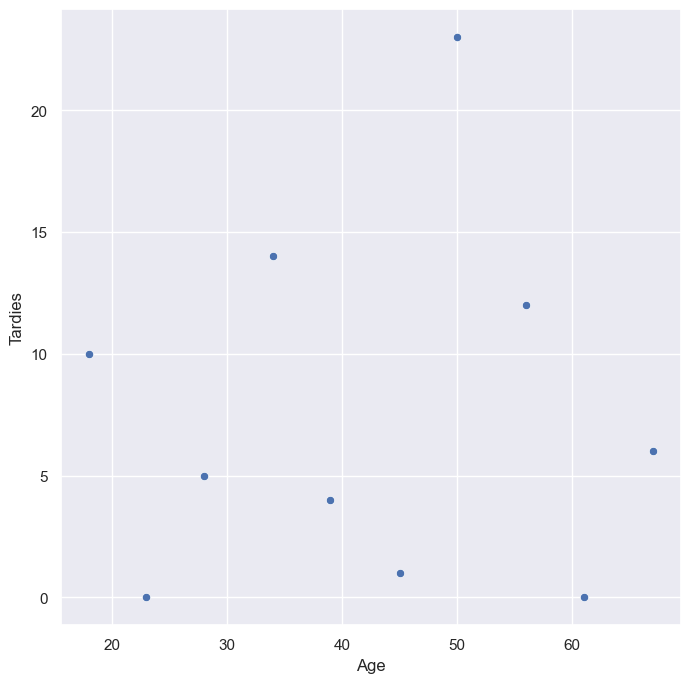

In [139]:
# Your code here.
sns.scatterplot(x = student_data_test.X_test , y =student_data_test.y_test)
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()

**Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?** 

¿Ves alguna tendencia? ¿Puedes formular alguna hipótesis sobre la relación entre la edad y el número de llegadas tarde?

    **We can see a trend between Age and tardies, Tardies is inversely proportional to the Age.**

    Podemos observar una tendencia entre la Edad y las llegadas tarde; las llegadas tarde son inversamente proporcionales a la Edad.


**Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.**

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

**Covarianza:**

La covarianza es una medida estadística que indica cómo dos variables aleatorias cambian juntas. Puede tomar valores positivos, negativos o cercanos a cero.

- **Covarianza Positiva:** Cuando es positiva, indica una relación positiva entre las variables.
- **Covarianza Negativa:** Cuando es negativa, indica una relación negativa entre las variables.
- **Covarianza Cercana a Cero:** Indica una relación débil o nula entre las variables.

La fórmula de covarianza es:

$$
\text{cov}(X, Y) = \frac{\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})}{n-1}
$$


**Observaciones específicas sobre este caso no pueden hacerse sin conocer los valores exactos de covarianza, pero estos valores proporcionan información sobre la relación entre Edad y llegadas tarde.**


In [27]:
# Your response here.
student_data.corr()

,X_train,y_train
X_train,1.000000,-0.939163
y_train,-0.939163,1.000000


La matriz de covarianza es una matriz cuadrada que proporciona información sobre las covarianzas entre pares de variables en un conjunto de datos multivariado. Supongamos que tienes dos variables, X e Y, y calculas la matriz de covarianza con `np.cov(student_data.X, student_data.Y)`. La matriz resultante será de la forma:

$$
\begin{bmatrix}
\text{cov}(X, X) & \text{cov}(X, Y) \\
\text{cov}(Y, X) & \text{cov}(Y, Y)
\end{bmatrix}
$$

Aquí hay una descripción de los elementos de la matriz:

- **cov(X, X):** La covarianza de X consigo misma. Esto proporciona información sobre la dispersión de la variable X.

- **cov(X, Y):** La covarianza entre X e Y. Indica la dirección de la relación lineal entre X e Y. Si es positiva, sugiere una relación positiva; si es negativa, sugiere una relación negativa.

- **cov(Y, X):** Es lo mismo que cov(X, Y) ya que la covarianza es simétrica.

- **cov(Y, Y):** La covarianza de Y consigo misma. Al igual que cov(X, X), proporciona información sobre la dispersión de la variable Y.

La diagonal principal (cov(X, X) y cov(Y, Y)) proporciona la varianza de las variables individuales, y los elementos fuera de la diagonal principal (cov(X, Y) y cov(Y, X)) proporcionan información sobre la covarianza entre las variables.

Es importante mencionar que la covarianza por sí sola no es suficiente para evaluar la fuerza de la relación entre dos variables, ya que depende de las unidades de medida. Para obtener una medida más estandarizada de la relación, a menudo se utiliza la correlación, que se calcula dividiendo la covarianza entre los productos de las desviaciones estándar de las variables.

In [28]:
np.cov(student_data.X_train, student_data.y_train)[0][1]

-45.56666666666667

**Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.**

Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Añade tus respuestas como comentarios después de tu código.

La línea de código `x=sm.add_constant(student_data.X)` está utilizando la función `add_constant` del módulo `sm` de `statsmodels` para agregar una columna de unos (constantes) a la variable `X` de tus datos. Esta acción es común en regresión lineal para incluir el término de intersección (o constante) en el modelo.

Cuando se realiza una regresión lineal simple, es decir, cuando tienes una sola variable predictora (`X`), agregar una constante al modelo significa que estás ajustando una recta que no pasa necesariamente por el origen. El modelo tiene la forma:

$$
Y = \beta_0 + \beta_1 \cdot X + \epsilon
$$

Donde:
- \( Y \) es la variable de respuesta.
- \( X \) es la variable predictora.
- $ \beta_0 $ es la constante (término de intersección).
- $ \beta_1 $ es el coeficiente asociado a \( X \).
- $ \epsilon $ es el término de error.

La función `add_constant` se utiliza para incluir explícitamente la constante $ \beta_0 $ en la matriz de variables predictoras.

Ahora, si tienes más de una columna en \( X \), es decir, si tienes múltiples variables predictoras (características), `add_constant` se encargará de agregar una columna de unos a la izquierda de tus variables predictoras. Esto es esencial para incluir el término de intersección en el modelo cuando hay múltiples variables predictoras. El modelo se extiende a:

$$
Y = \beta_0 + \beta_1 \cdot X_1 + \beta_2 \cdot X_2 + \ldots + \beta_n \cdot X_n + \epsilon
$$

Donde $ X_1, X_2, \ldots, X_n $ son las diferentes variables predictoras, y $ \beta_0, \beta_1, \ldots, \beta_n $ son los coeficientes asociados.

En resumen, `add_constant` asegura que el término de intersección sea incluido correctamente en el modelo de regresión lineal, independientemente de si tienes una o varias variables predictoras.

### **NORMALIZANDO DATOS**

In [100]:
X_train = np.array(student_data.X_train.tolist())
y_train = np.array(student_data.y_train.tolist())
X_test = np.array(student_data_test.X_test.tolist())
y_test = np.array(student_data_test.y_test.tolist())

In [102]:
# Normalizacion de X
scaler_x = MinMaxScaler()
scaler_x.fit(X_train.reshape(-1,1))
X_train = scaler_x.transform(X_train.reshape(-1,1))
X_test = scaler_x.transform(X_test.reshape(-1,1))


# Normalizacion de y
scaler_y = MinMaxScaler()
scaler_y.fit(y_test.reshape(-1,1)) # .reshape(-1, 1) se utiliza para transformar un vector a una matriz
y_train = scaler_y.transform(y_train.reshape(-1,1))
y_test = scaler_y.transform(y_test.reshape(-1,1))

### **ENTRENAMIENTO Y PREDICCIONES**

In [140]:
# Your response here.
X_train=sm.add_constant(X_train)

modelo=sm.OLS(y_train, X_train).fit()

X_test = sm.add_constant(X_test)

pred = modelo.predict(X_test)

#  proporciona información detallada sobre los resultados del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           5.57e-05
Time:                        00:23:44   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

In [141]:
for y, i in zip(y_test, pred):
    print(f"{y}, {i}")

10, 8.51802948664811
0, 7.303925632068208
5, 6.0898217774883046
14, 4.63289715199242
4, 3.418793297412517
1, 1.9618686719166334
23, 0.74776481733673
12, -0.7091598081591552
0, -1.9232636627390587
6, -3.380188288234944


La función `summary()` en `statsmodels` proporciona una descripción detallada de los resultados de un modelo ajustado. Esta función devuelve un objeto `Summary` que contiene información clave sobre el modelo. Aquí hay una descripción general de la información que puedes obtener de `summary()`:

1. **Resumen de Estadísticas Generales:**
   - **Modelo:** Tipo de modelo ajustado (p. ej., OLS para Mínimos Cuadrados Ordinarios).
   - **Fecha y Hora:** Cuándo se ajustó el modelo.
   - **Número de Observaciones:** Cantidad total de observaciones en el conjunto de datos.
   - **Grados de Libertad Residuales:** Representa la cantidad de grados de libertad en el error del modelo.

2. **Estadísticas de Ajuste:**
   - **R-cuadrado:** Mide la proporción de la variabilidad en la variable de respuesta explicada por el modelo.
   - **R-cuadrado ajustado:** Ajusta el R-cuadrado para tener en cuenta el número de predictores en el modelo.
   - **Estadístico F:** Prueba estadística para evaluar la significancia global del modelo.

3. **Coeficientes:**
   - **Intercepto:** Valor estimado para la constante (término de intersección).
   - **Coeficientes para Variables Predictoras:** Valores estimados para los coeficientes de las variables predictoras.
   - **Errores Estándar:** Desviaciones estándar de los coeficientes estimados.
   - **Valores t:** Relación entre el coeficiente estimado y su error estándar.
   - **P-values:** Probabilidad de observar un valor t igual o más extremo bajo la hipótesis nula de que el coeficiente es igual a cero.

4. **Diagnósticos de Residuos:**
   - **Estadísticos Durbin-Watson:** Prueba para detectar la presencia de autocorrelación en los residuos.
   - **Jarque-Bera:** Prueba para evaluar la normalidad de los residuos.
   - **Omnibus:** Proporciona información adicional sobre la normalidad de los residuos.

5. **Información Adicional:**
   - **AIC (Criterio de Información de Akaike):** Criterio de información que penaliza modelos con demasiados parámetros.
   - **BIC (Criterio de Información Bayesiano):** Similar al AIC pero con una penalización más fuerte para modelos con más parámetros.

6. **Tabla de Coeficientes:**
   - **Intercepto y Coeficientes de Variables Predictoras:** Tabla que resume los coeficientes, errores estándar, estadísticos t y valores p para cada variable del modelo.

En resumen proporciona una visión integral del rendimiento del modelo, la significancia de los coeficientes, la calidad del ajuste y diagnósticos de residuos para evaluar la validez de las suposiciones subyacentes del modelo. Es una herramienta esencial para interpretar y evaluar la eficacia de un modelo ajustado.

**modelo.params** es una propiedad específica del objeto resultante de ajustar un modelo en statsmodels. Proporciona los coeficientes estimados del modelo ajustado. Cuando ajustas un modelo usando sm.OLS(y, x).fit(), modelo.params contendrá los valores estimados para los coeficientes del modelo.

In [143]:
modelo.params

array([12.88880336, -0.24282077])

In [69]:
# Es decir, como estamos usando un modelo de regresion simple, podemos:
print(f"Los valores de predicción se obtienen con la recta:\n y_hat = {modelo.params[0]} + ({modelo.params[1]})X")

Los valores de predicción se obtienen con la recta:
 y_hat = 12.888803363135764 + (-0.2428207709159807)X


**Plot your regression model on your scatter plot.**

Grafica tu modelo de regresión en tu diagrama de dispersión.

In [68]:
def plot_regression_model(x,y):
    
    x_const = sm.add_constant(x) # add a constant to the model
    
    modelo = sm.OLS(y, x_const).fit() # fit the model
    
    pred = modelo.predict(x_const) # make predictions
    
    print(modelo.summary())
    
    const = modelo.params[0] # create a variable with the value of the constant given by the summary
    coef = modelo.params[1] # create a variable with the value of the coef given by the summary
    
    x_l=np.linspace(x.min(), x.max(), 50) 
    y_l= coef*x_l + const # function of the line

    plt.figure(figsize=(10, 10))

    # plot the line
    plt.plot(x_l, y_l, label=f'{x.name} vs {y.name}={coef}*{x.name}+{const}')

    # data
    plt.scatter(x, y, marker='x', c='g', label=f'{x.name} vs {y.name}')

    plt.title('Regresion lineal')
    plt.xlabel(f'{x.name}')
    plt.ylabel(f'{y.name}')
    plt.legend()
    plt.show()

    return modelo

In [11]:
plot_regression_model(student_data.X_train, student_data.y_train)

NameError: name 'plot_regression_model' is not defined

### Esta función quiere usar train y test, pero el modelo tiene un 0.88 de r2 y sin embargo las predicciones son una mierda...............

In [124]:
def plot_regression_model_ana(X_train, y_train, X_test, y_test):
    
    # Añadir una constante a los datos de entrenamiento y prueba
    x_const_train = sm.add_constant(X_train)
    x_const_test = sm.add_constant(X_test)
    
    # Ajustar el modelo utilizando datos de entrenamiento
    modelo = sm.OLS(y_train, x_const_train).fit()
    
    # Hacer predicciones utilizando datos de prueba
    pred = modelo.predict(x_const_test)

    # Imprimir resumen del modelo
    print(modelo.summary())
    
    # Obtener los coeficientes del modelo
    const = modelo.params[0]
    coef = modelo.params[1]
    
    # Imprimir información sobre la recta de regresión
    print("------------------------------------------------------------------------------------")
    print(f"Los valores de predicción se obtienen con la recta:\n y_hat = {const} + ({coef})X")
    
    # Crear una figura para el gráfico
    plt.figure(figsize=(10, 10))

    # Graficar la recta de regresión
    plt.plot(X_test, pred, label=f'Regresión: y = {const} + {coef}*X', color='red')

    # Valores predichos
    plt.scatter(X_test, pred, marker='+', c='black', label='Valores predichos')

    # Graficar los puntos de prueba y los valores reales de y_test
    plt.scatter(X_test, y_test, marker='x', c='green', label='Valores del test')

    # Graficar los puntos de prueba y los valores reales de y_test
    plt.scatter(X_train, y_train, marker='.', c='blue', label='Valores del train')
    
    # Etiquetas y título del gráfico
    plt.title('Regresión lineal')
    plt.xlabel('Variable X')
    plt.ylabel('Variable Y')
    
    plt.xlim(min(X_test), max(X_test))  # Reemplaza x_min y x_max con los valores deseados
    plt.ylim(min(y_test), max(y_test))

    # Mostrar leyenda
    plt.legend()

    # Mostrar el gráfico
    plt.show()

    return modelo, pred

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           5.57e-05
Time:                        00:33:19   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

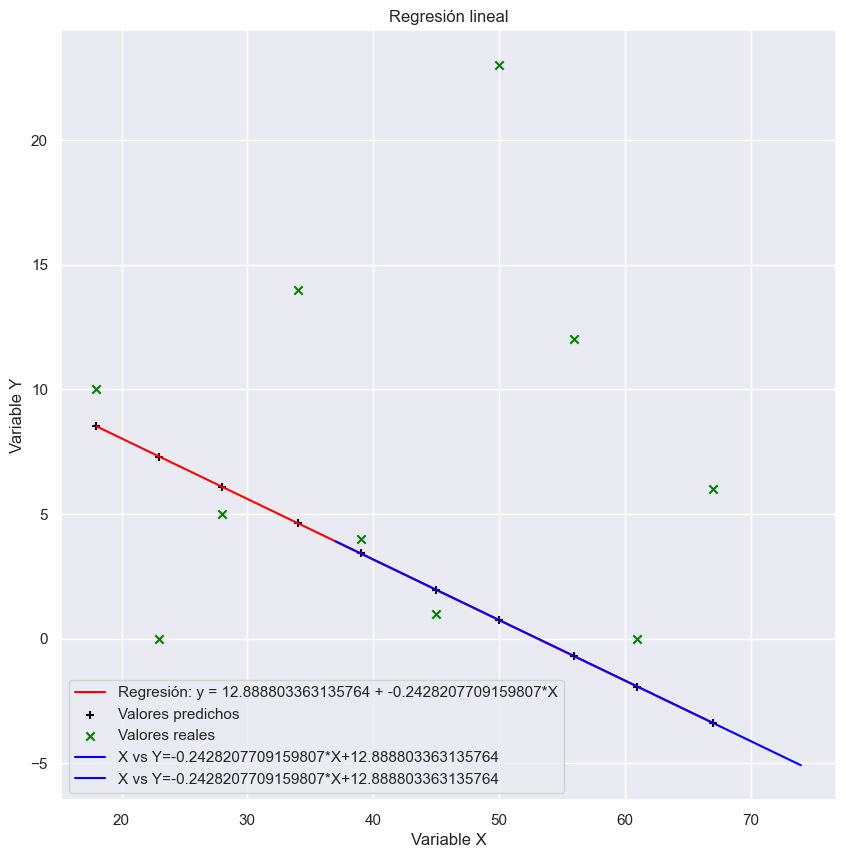

In [159]:
plot_regression_model_ana(student_data.X_train, student_data.y_train, student_data_test.X_test, student_data_test.y_test)

**Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.**

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes extraer de tu modelo y qué tan segura estás de esas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

    Based on this results we can say that the Age is a good predictor for tardiness, at more age the probability of tardiness is lower.

    Basándonos en estos resultados, podemos afirmar que la Edad es un buen predictor de la tardanza; a mayor edad, la probabilidad de tardanza es menor.

## Challenge 2
**For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables.**

Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, como el modelo, la marca, los estándares de eficiencia energética, así como las emisiones de CO2 de cada automóvil. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos en función de varias variables independientes.

In [3]:
# Import any libraries you may need & the data
df = pd.read_csv('../Data/vehicles.csv')
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


**Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable.** 

**Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.**

Utilicemos las siguientes variables para nuestro análisis: Año (Year), Cilindros (Cylinders), Barriles de Combustible por Año (Fuel Barrels/Year), MPG Combinado (Combined MPG) y Costo de Combustible por Año (Fuel Cost/Year). Utilizaremos 'Emisiones de CO2 en Gramos por Milla' ('CO2 Emission Grams/Mile') como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál crees que será la variable más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

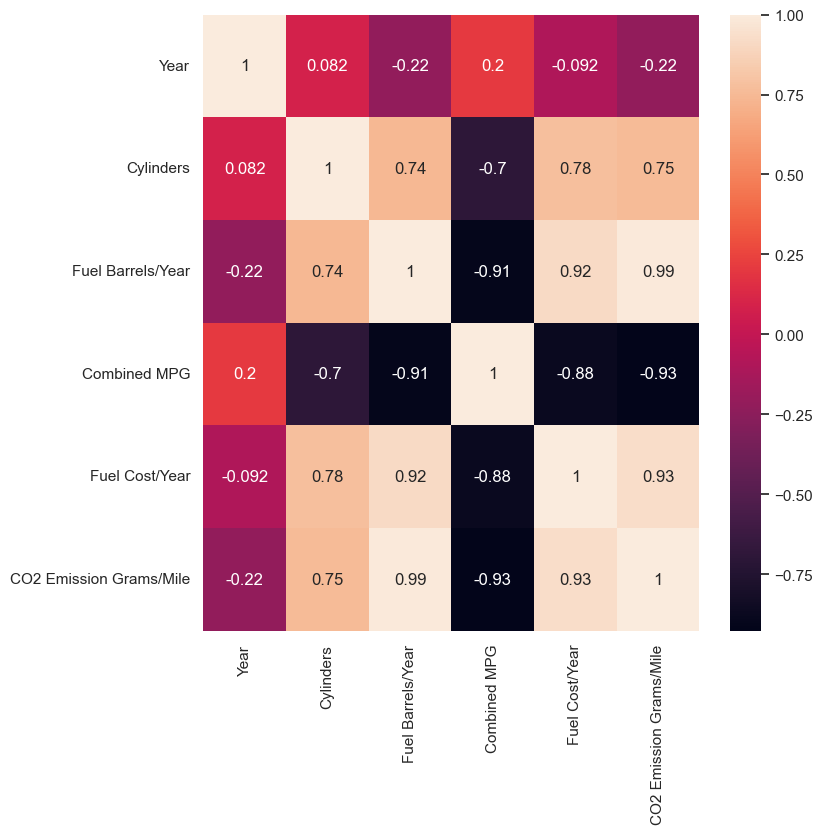

In [5]:
# Your response here. 
cars = df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

sns.heatmap(cars.corr(), annot=True)
plt.show()

    The most important variable to predict the CO2 emissions is Fuel Barrels/Year, and the variable that is lower helpful is the Year

    La variable más importante para predecir las emisiones de CO2 es Barriles de Combustible por Año (Fuel Barrels/Year), y la variable que proporciona menos información útil es el Año (Year).

**Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.**

Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [7]:
# Your response here. 
X = cars.drop('CO2 Emission Grams/Mile', axis = 1)
y = cars['CO2 Emission Grams/Mile']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

modelo=sm.OLS(y_train, X_train).fit()

pred = modelo.predict(X_test)

X_train: (25166, 5), y_train: (25166,)
X_test: (10786, 5),  y_test: (10786,)


    We decide an OLS because with it can make a summary an interpret the result with it.

    Optamos por OLS (Mínimos Cuadrados Ordinarios) porque con él podemos realizar un resumen e interpretar los resultados.

**Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.**

Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes extraer de tu modelo y qué tan segura estás de esas conclusiones? Agrega tus respuestas como comentarios después de tu código.

In [8]:
# Your response here. 
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          4.162e+06
Date:                     Tue, 05 Dec 2023   Prob (F-statistic):                        0.00
Time:                             16:35:06   Log-Likelihood:                     -1.0705e+05
No. Observations:                    25166   AIC:                                  2.141e+05
Df Residuals:                        25161   BIC:                                  2.142e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0629      0.001     62.302      0.000       0.061       0.065
Cylinders             0.9140      0.098      9.363      0.000       0.723       1.105
Fuel Barrels/Year    19.7591      0.071    279.139      0.000      19.620      19.898
Combined MPG         -3.0368      0.052    -58.962      0.000      -3.138      -2.936
Fuel Cost/Year        0.0300      0.001     51.195      0.000       0.029       0.031
==============================================================================
Omnibus:                    50582.810   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        186713942.727
Skew:                          16.504   Prob(JB):                         0.00
Kurtosis:                     423.682   Cond. No.                     2.53e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

    Based on the results all the feactures have a pvalue = 0, so all of it have important significance on the model.

    Basándonos en los resultados, todas las características tienen un valor p = 0, por lo que todas tienen una significancia importante en el modelo.

In [9]:
modelo.params

Year                  0.062949
Cylinders             0.914012
Fuel Barrels/Year    19.759087
Combined MPG         -3.036810
Fuel Cost/Year        0.029959
dtype: float64

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.051
Model:                                 OLS   Adj. R-squared:                  0.051
Method:                      Least Squares   F-statistic:                     584.0
Date:                     Tue, 05 Dec 2023   Prob (F-statistic):          1.05e-125
Time:                             16:37:22   Log-Likelihood:                -66498.
No. Observations:                    10786   AIC:                         1.330e+05
Df Residuals:                        10784   BIC:                         1.330e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

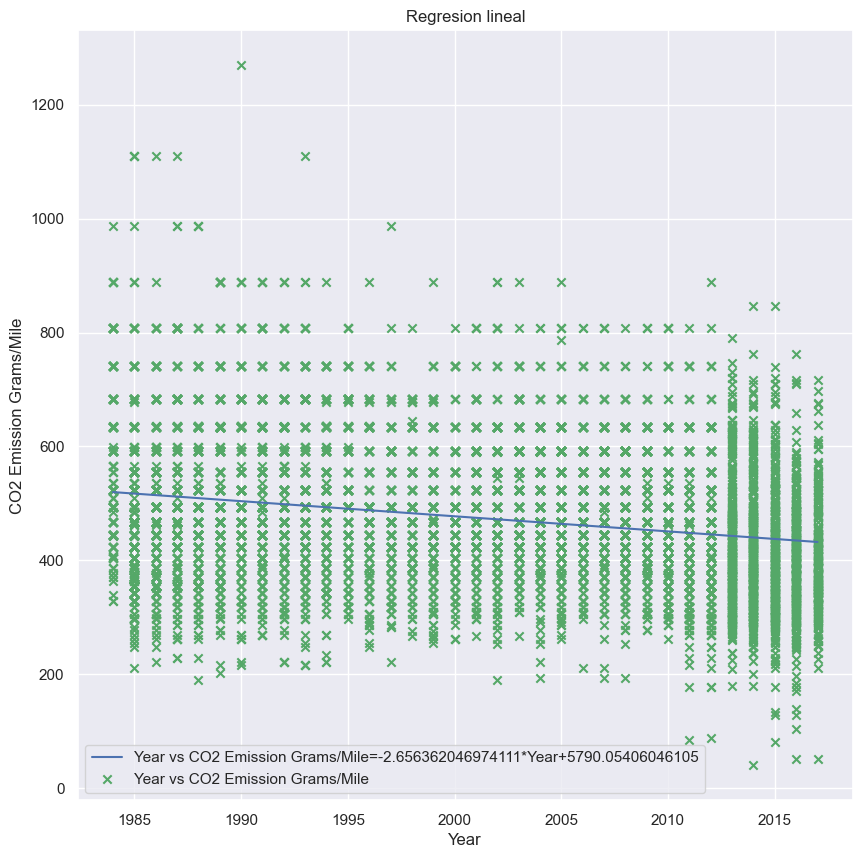

In [14]:
plot_regression_model(X_test.Year, y_test)

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.049
Model:                                 OLS   Adj. R-squared:                  0.049
Method:                      Least Squares   F-statistic:                     1285.
Date:                     Tue, 05 Dec 2023   Prob (F-statistic):          1.34e-274
Time:                             17:13:25   Log-Likelihood:            -1.5544e+05
No. Observations:                    25166   AIC:                         3.109e+05
Df Residuals:                        25164   BIC:                         3.109e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

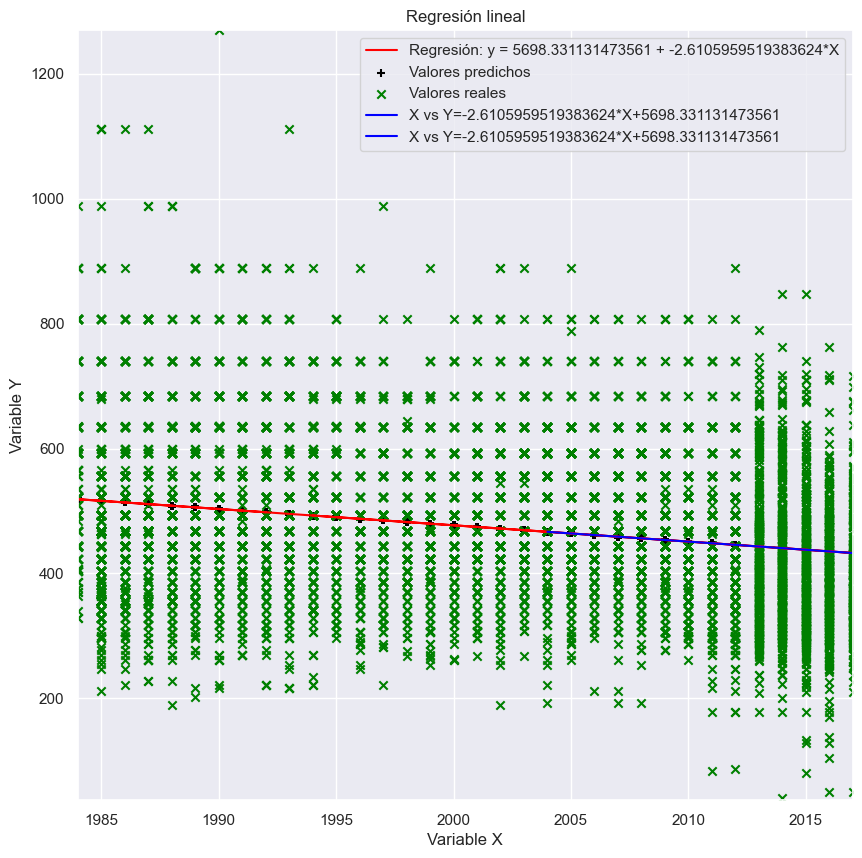

In [30]:
plot_regression_model_ana(X_train.Year, y_train, X_test.Year, y_test)

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.565
Model:                                 OLS   Adj. R-squared:                  0.565
Method:                      Least Squares   F-statistic:                 3.273e+04
Date:                     Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                             17:17:51   Log-Likelihood:            -1.4558e+05
No. Observations:                    25166   AIC:                         2.912e+05
Df Residuals:                        25164   BIC:                         2.912e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

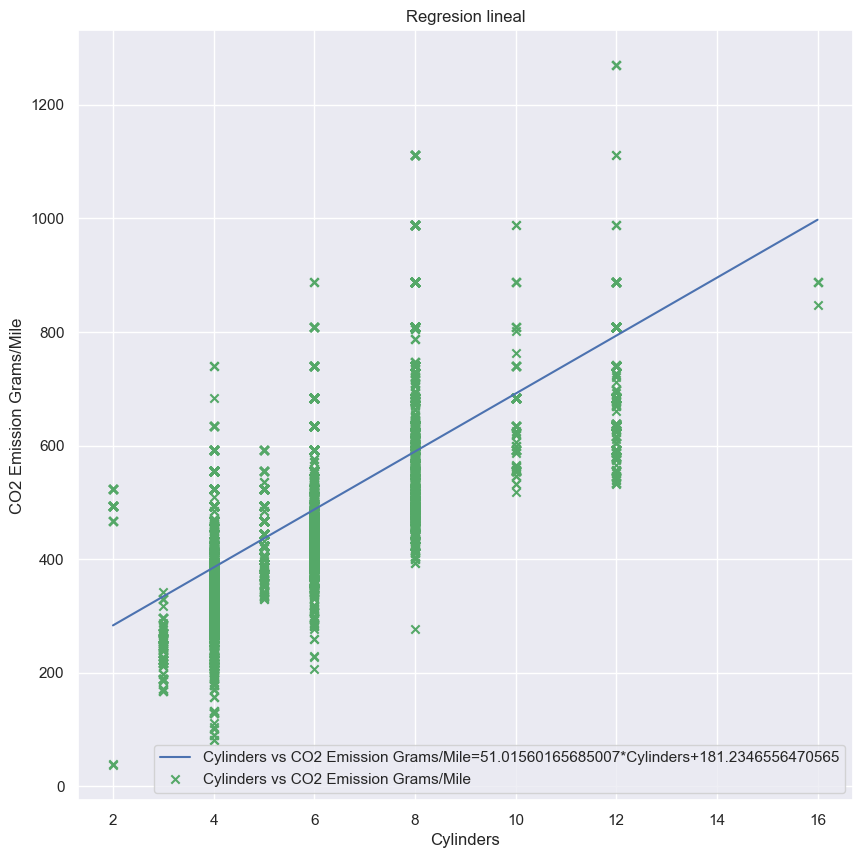

In [31]:
plot_regression_model(X_train.Cylinders, y_train)

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.565
Model:                                 OLS   Adj. R-squared:                  0.565
Method:                      Least Squares   F-statistic:                 3.273e+04
Date:                     Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                             17:18:41   Log-Likelihood:            -1.4558e+05
No. Observations:                    25166   AIC:                         2.912e+05
Df Residuals:                        25164   BIC:                         2.912e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

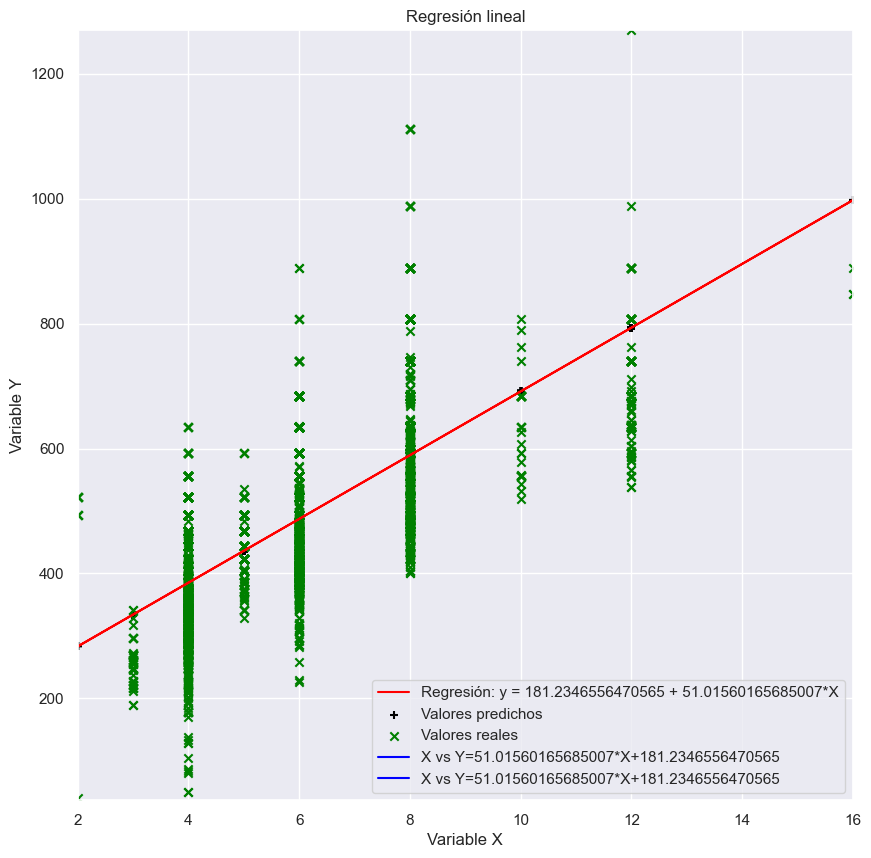

In [33]:
plot_regression_model_ana(X_train.Cylinders, y_train, X_test.Cylinders, y_test)

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.972
Model:                                 OLS   Adj. R-squared:                  0.972
Method:                      Least Squares   F-statistic:                 8.711e+05
Date:                     Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                             17:19:36   Log-Likelihood:            -1.1111e+05
No. Observations:                    25166   AIC:                         2.222e+05
Df Residuals:                        25164   BIC:                         2.222e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

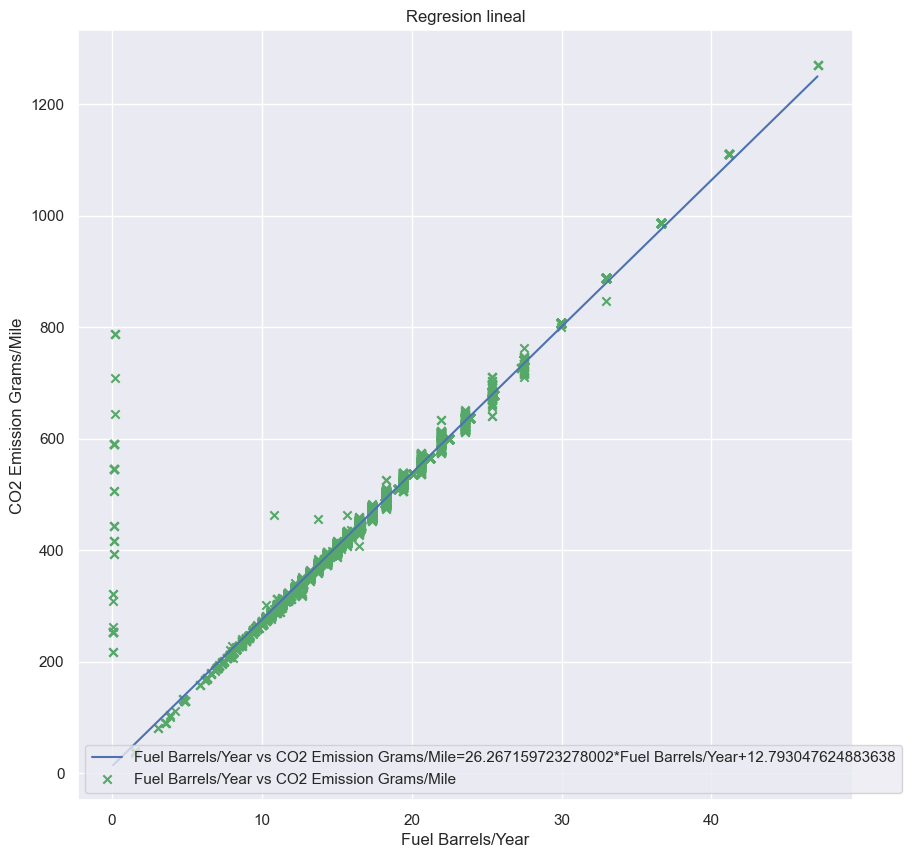

In [34]:
plot_regression_model(X_train['Fuel Barrels/Year'], y_train)

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.972
Model:                                 OLS   Adj. R-squared:                  0.972
Method:                      Least Squares   F-statistic:                 8.711e+05
Date:                     Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                             17:20:24   Log-Likelihood:            -1.1111e+05
No. Observations:                    25166   AIC:                         2.222e+05
Df Residuals:                        25164   BIC:                         2.222e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

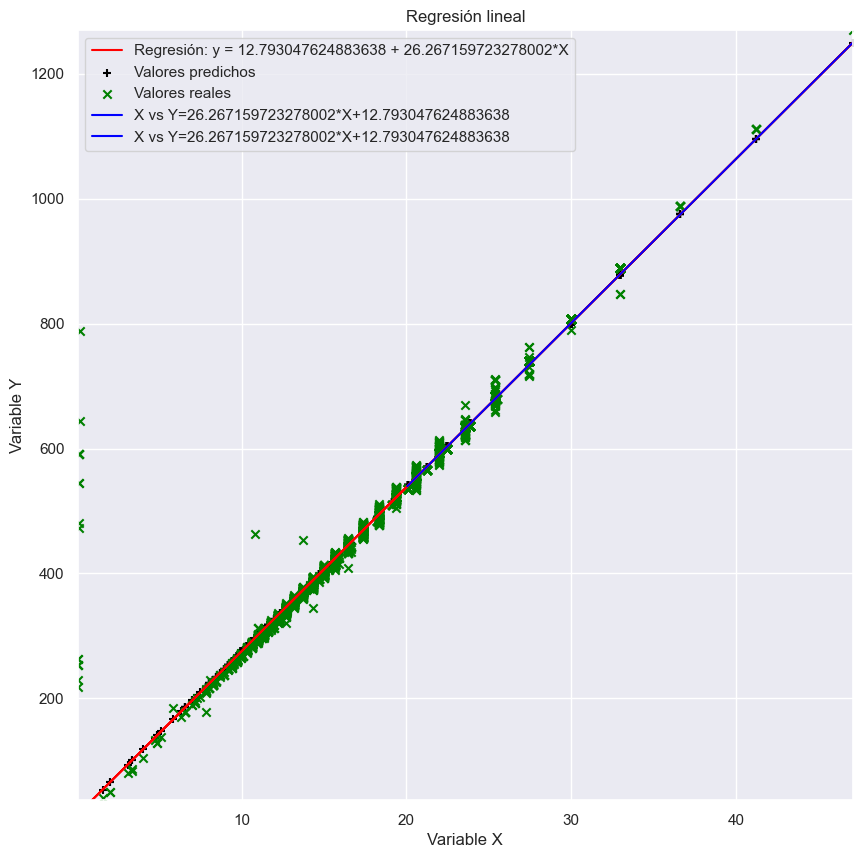

In [35]:
plot_regression_model_ana(X_train['Fuel Barrels/Year'], y_train, X_test['Fuel Barrels/Year'], y_test)

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.855
Model:                                 OLS   Adj. R-squared:                  0.855
Method:                      Least Squares   F-statistic:                 1.481e+05
Date:                     Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                             17:21:39   Log-Likelihood:            -1.3179e+05
No. Observations:                    25166   AIC:                         2.636e+05
Df Residuals:                        25164   BIC:                         2.636e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

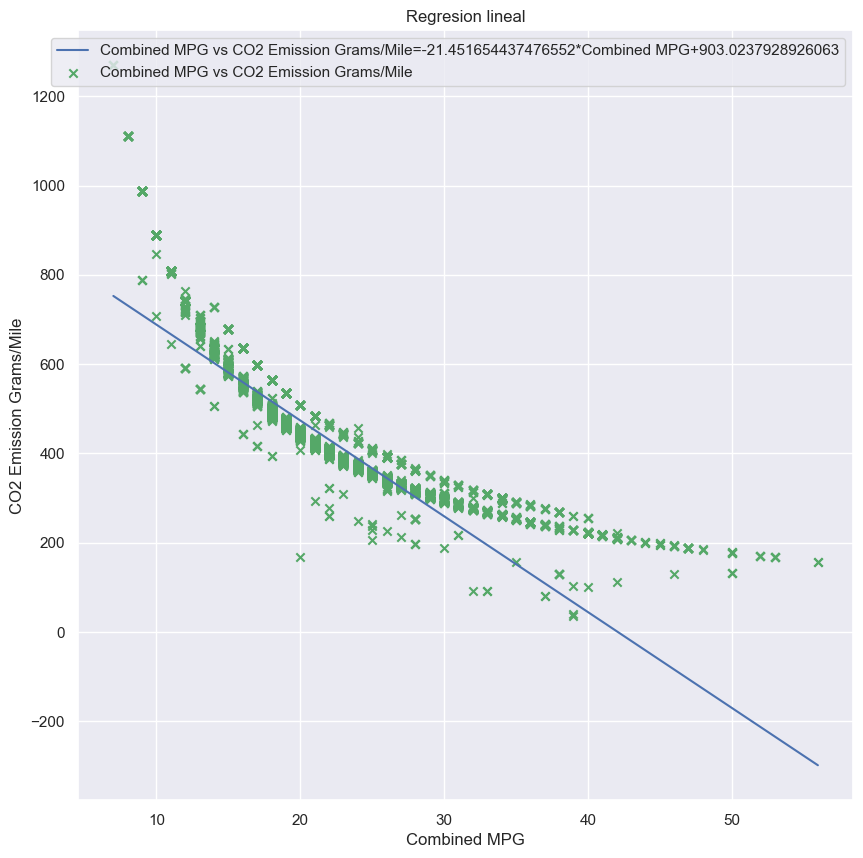

In [36]:
plot_regression_model(X_train['Combined MPG'], y_train)

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.855
Model:                                 OLS   Adj. R-squared:                  0.855
Method:                      Least Squares   F-statistic:                 1.481e+05
Date:                     Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                             17:22:17   Log-Likelihood:            -1.3179e+05
No. Observations:                    25166   AIC:                         2.636e+05
Df Residuals:                        25164   BIC:                         2.636e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

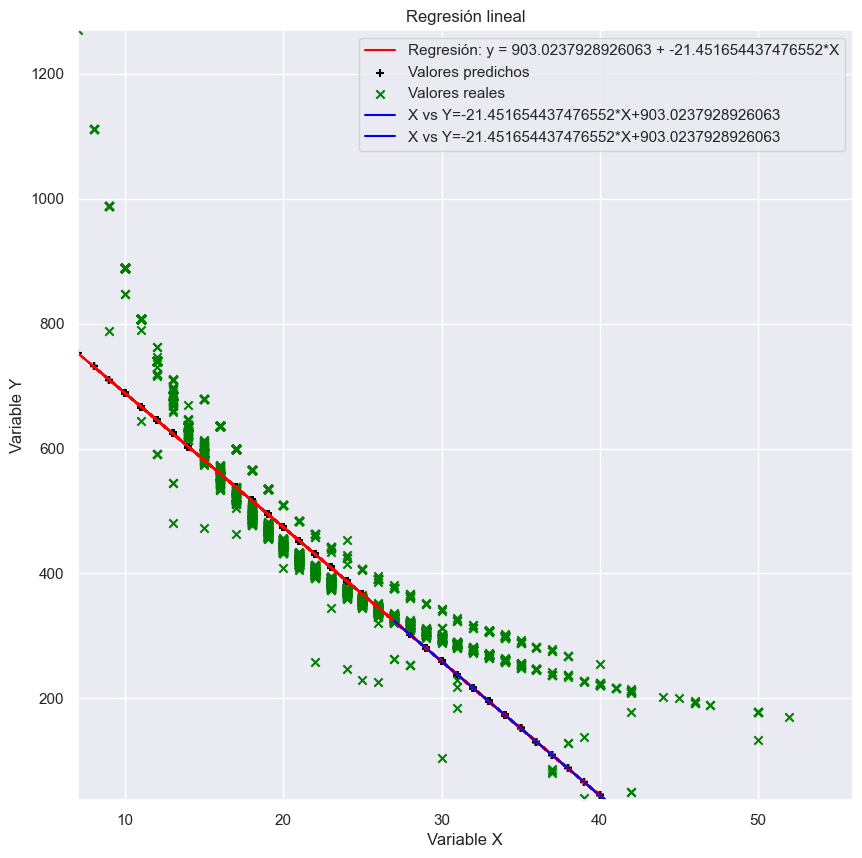

In [37]:
plot_regression_model_ana(X_train['Combined MPG'], y_train, X_test['Combined MPG'], y_test)

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.867
Model:                                 OLS   Adj. R-squared:                  0.867
Method:                      Least Squares   F-statistic:                 1.647e+05
Date:                     Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                             17:23:09   Log-Likelihood:            -1.3064e+05
No. Observations:                    25166   AIC:                         2.613e+05
Df Residuals:                        25164   BIC:                         2.613e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

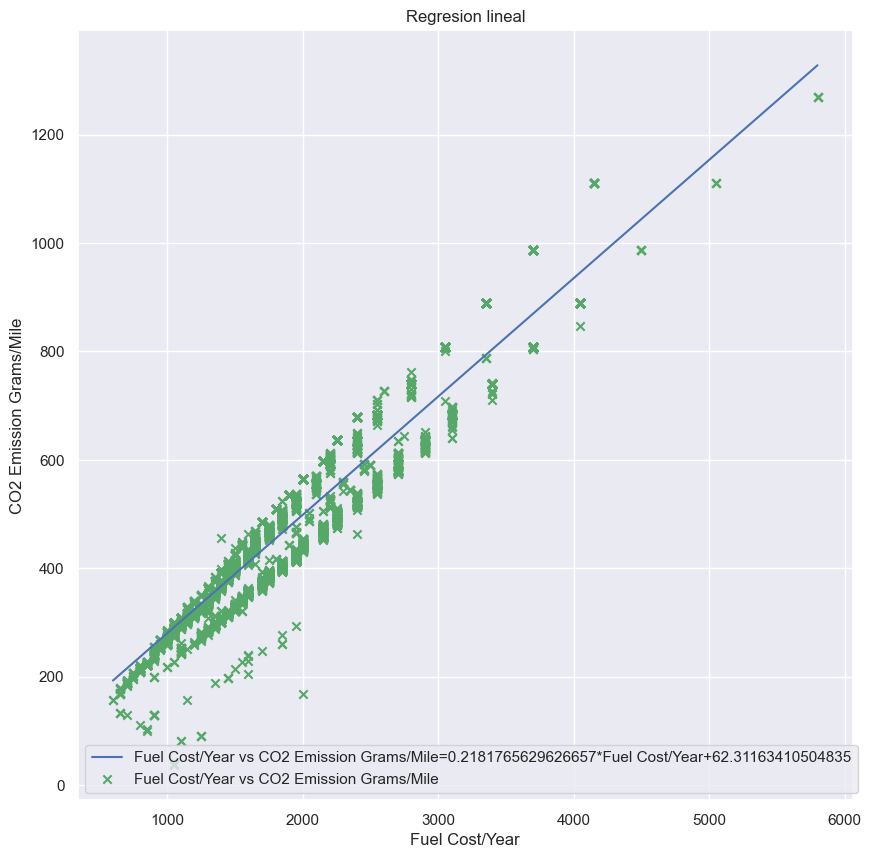

In [38]:
plot_regression_model(X_train['Fuel Cost/Year'], y_train)

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.867
Model:                                 OLS   Adj. R-squared:                  0.867
Method:                      Least Squares   F-statistic:                 1.647e+05
Date:                     Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                             17:23:38   Log-Likelihood:            -1.3064e+05
No. Observations:                    25166   AIC:                         2.613e+05
Df Residuals:                        25164   BIC:                         2.613e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

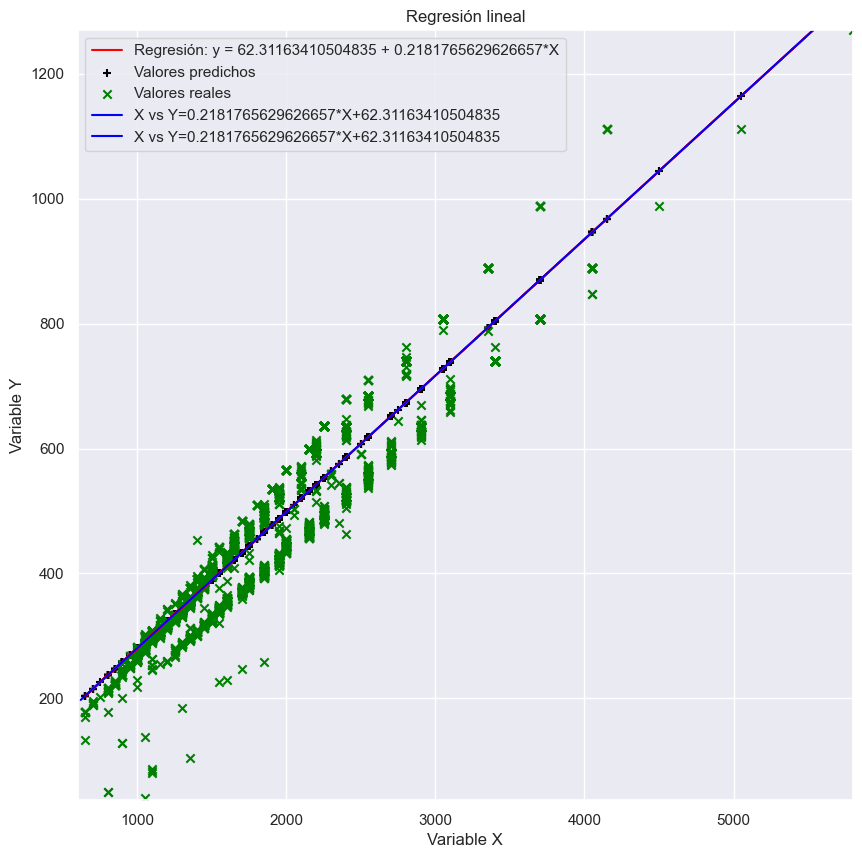

In [39]:
plot_regression_model_ana(X_train['Fuel Cost/Year'], y_train, X_test['Fuel Cost/Year'], y_test)

## **Bonus Challenge: Error Analysis**

**I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended.** 

Sospecho de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

**We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. First, build a dataframe with the data.**

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal. Primero, construye un marco de datos con los datos.

In [189]:
X_train = [1,3,4,6,8,9,11,14]
y_train = [1,2,4,4,5,7,8,13]

parties = pd.DataFrame({'X_train': X_train, 'y_train': y_train})

X_test = np.linspace(1, 14, 8)
X_test = X_test.astype(int)
y_test = []
for train, y, test in zip(X_train, y_train, X_test):
    try:
        y_test.append(int(test/(np.abs(train/y))))
    except:
        y_test.append(0)

parties_test = pd.DataFrame({'X_test': X_test, 'y_test': y_test})

**Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.**

Realiza un diagrama de dispersión (gráfico de dispersión) para los datos y ajusta una línea de regresión.

**What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.**

¿Qué ves? ¿Qué te dice este gráfico acerca de la probable relación entre las variables? Imprime los resultados de tu regresión.

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           0.000102
Time:                        22:06:03   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.5

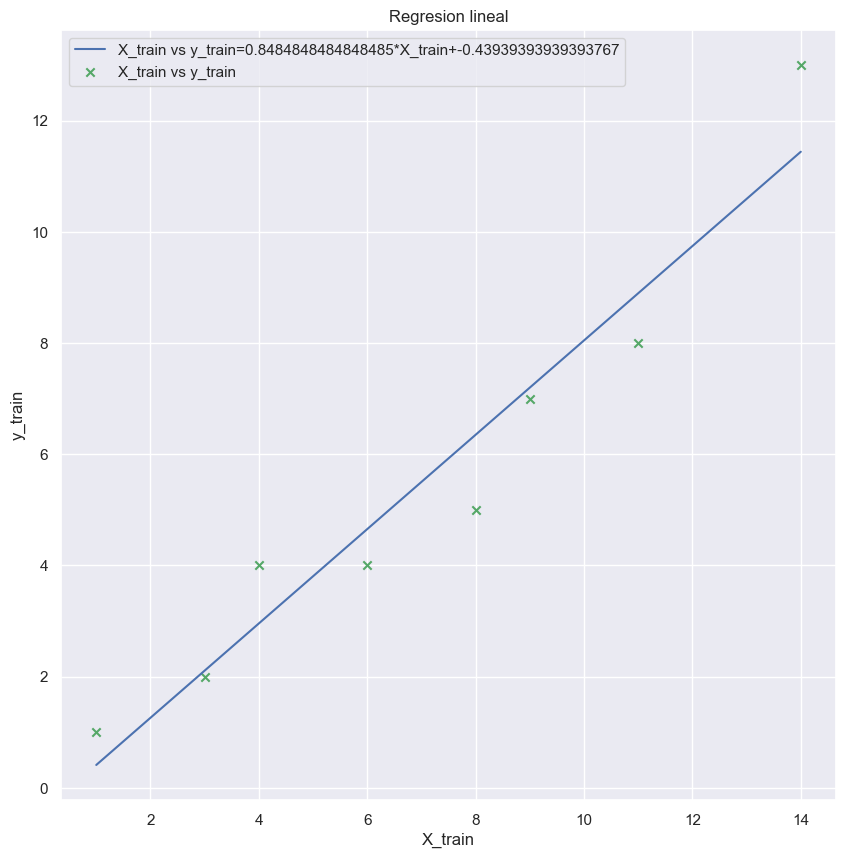

In [190]:
modelo_train = plot_regression_model(parties.X_train, parties.y_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           0.000102
Time:                        22:06:14   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.5

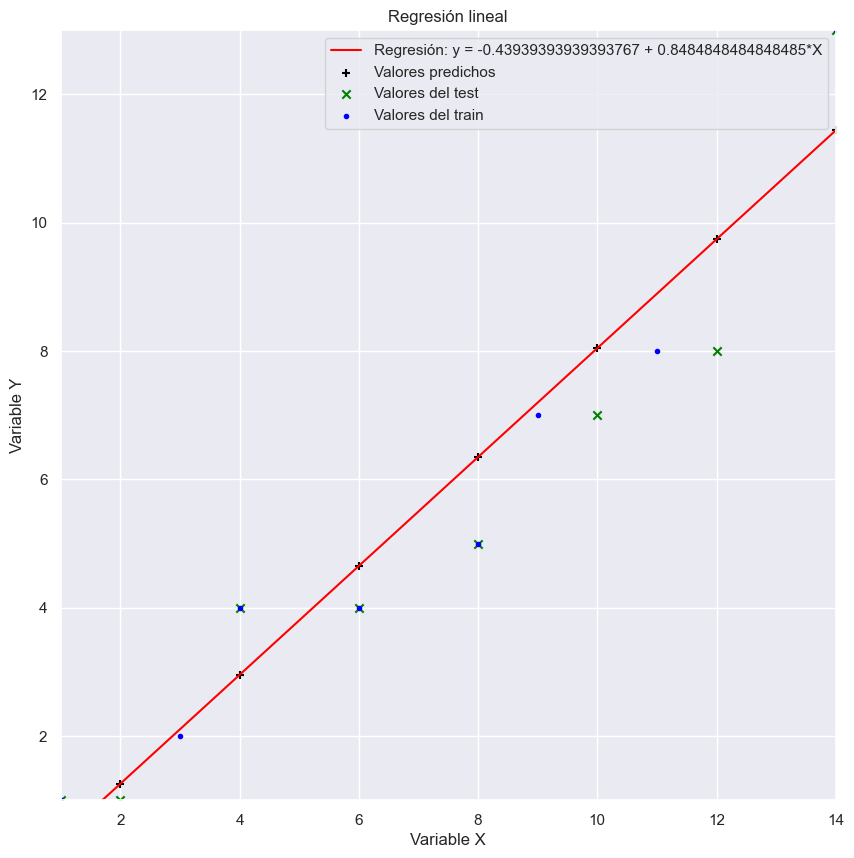

In [191]:
modelo_test, pred = plot_regression_model_ana(X_train, y_train, X_test, y_test)

Df Residuals (Grados de libertad residuales):

Representa los grados de libertad residuales del modelo, que es el número de observaciones menos el número de parámetros estimados en el modelo. En este caso, hay 6 grados de libertad residuales. Los grados de libertad residuales están asociados con la variabilidad no explicada por el modelo.

**Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model.**

¿Observas algún punto problemático o valor atípico en tus datos? Elimina estos puntos y vuelve a calcular tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados del mismo.

El IQR es útil para identificar posibles valores atípicos en los datos. Puedes usar el IQR de la siguiente manera:

Identificar Outliers:

Los valores que están por encima de $Q3 + 1.5 * IQR$ o por debajo de $Q1 - 1.5 * IQR$ son considerados valores atípicos.
Puedes utilizar esta información para identificar y potencialmente eliminar o corregir valores atípicos en tus datos.
Filtrar Datos:

Puedes utilizar el IQR para filtrar tus datos y quedarte solo con los valores que no son atípicos.

In [72]:
# Your response here. 
# Calculamos el IQR de X y de Y
stats = parties.describe().T
stats['IQR']=stats['75%']-stats['25%']

stats

,count,mean,std,min,25%,50%,75%,max,IQR
X_train,8.0,7.0,4.342481,1.0,3.75,7.0,9.50,14.0,5.75
y_train,8.0,5.5,3.817254,1.0,3.50,4.5,7.25,13.0,3.75


El test de Tukey, también conocido como el método de los "bigotes" en un diagrama de caja (box plot), es una técnica estadística utilizada para identificar valores atípicos en un conjunto de datos. La idea principal del test de Tukey es identificar valores que están significativamente fuera de los cuartiles del conjunto de datos.

Aquí hay una descripción básica del procedimiento:

1. **Calcular el Rango Intercuartílico (IQR):**
   - El IQR es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). Matemáticamente, IQR = Q3 - Q1.

2. **Calcular los Límites:**
   - Se establecen límites inferior y superior para identificar los valores atípicos. 
   - Límite inferior: Q1 - 1.5 * IQR
   - Límite superior: Q3 + 1.5 * IQR

3. **Identificar Valores Atípicos:**
   - Cualquier valor por debajo del límite inferior o por encima del límite superior se considera un valor atípico.

En términos más simples, el test de Tukey considera como valores atípicos aquellos que están más allá de un cierto número de veces el IQR desde los cuartiles. El factor multiplicativo 1.5 es una convención común, pero puede ajustarse según la situación.

Este método es eficaz para identificar valores atípicos que están significativamente lejos de la mayoría de los datos en un conjunto. Sin embargo, es importante tener en cuenta que el test de Tukey tiene sus limitaciones y puede no identificar todos los tipos de valores atípicos en todos los conjuntos de datos. Es una herramienta útil, pero siempre es recomendable combinarla con un entendimiento del contexto específico de los datos.

La elección del umbral (threshold) en el test de Tukey depende de la naturaleza de tus datos y del grado de conservadurismo que desees aplicar al identificar valores atípicos. Comúnmente, se utiliza el valor estándar de 1.5, pero este puede ajustarse según tus necesidades y el contexto de tus datos.

La fórmula general para identificar valores atípicos en el test de Tukey es:

Límite Inferior: $Q1 - threshold * IQR$

Límite Superior: $Q3 + threshold * IQR$

Ajustar el valor de threshold puede afectar la sensibilidad del método. Un valor más alto hará que el método sea menos sensible, identificando menos valores como atípicos, mientras que un valor más bajo hará que el método sea más sensible, identificando más valores como atípicos.

Algunas consideraciones prácticas:

Un valor común es 1.5, pero si deseas ser más conservador, puedes considerar 2.0 o incluso 3.0.
Si tienes datos que son propensos a tener valores atípicos, es posible que desees utilizar un umbral más alto.
Si tus datos son bastante robustos y no esperas muchos valores atípicos, puedes utilizar un umbral más bajo.

In [184]:
def get_outliers(df: pd.DataFrame, threshold: float = 1.5) -> pd.DataFrame:
    
    stats = df.describe().T
    stats['IQR']=stats['75%']-stats['25%']

    """
    Esta funcion recibe el df_train
    crea stats que describe el df_train, traspuesto
    Devuelve un dataframe.
    
    """
    
    outliers=pd.DataFrame(columns=stats.index)
    # variable en realidad es el nombre de las columnas de nuestro df original pero como stats está traspuesto se han convertido en indices
    for variable in stats.index:
        # Aplicando el test de tukey:
        iqr=stats.at[variable, 'IQR']
        q1 = stats.at[variable, '25%']
        q3 = stats.at[variable, '75%']
        lower= q1 - (threshold * iqr)
        upper= q3 + (threshold * iqr)

        # Evaluando las columnas y filtrando las filas del df original que cumplen el test de tukey
        outliers=df[(df[variable] < lower) | (df[variable] > upper)].copy()
        outliers['responsable']=variable
        
    return outliers

In [192]:
outliers = get_outliers(parties)
for i in parties.index:
    if i in outliers.index:
        parties_sin_outliers = parties.drop(i).copy()

**What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?**

¿Qué cambió? Basándote en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir acerca de la forma de los datos con el punto problemático y sin él?

c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           0.000264
Time:                        22:06:46   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3233      0.513      0.630      0.5

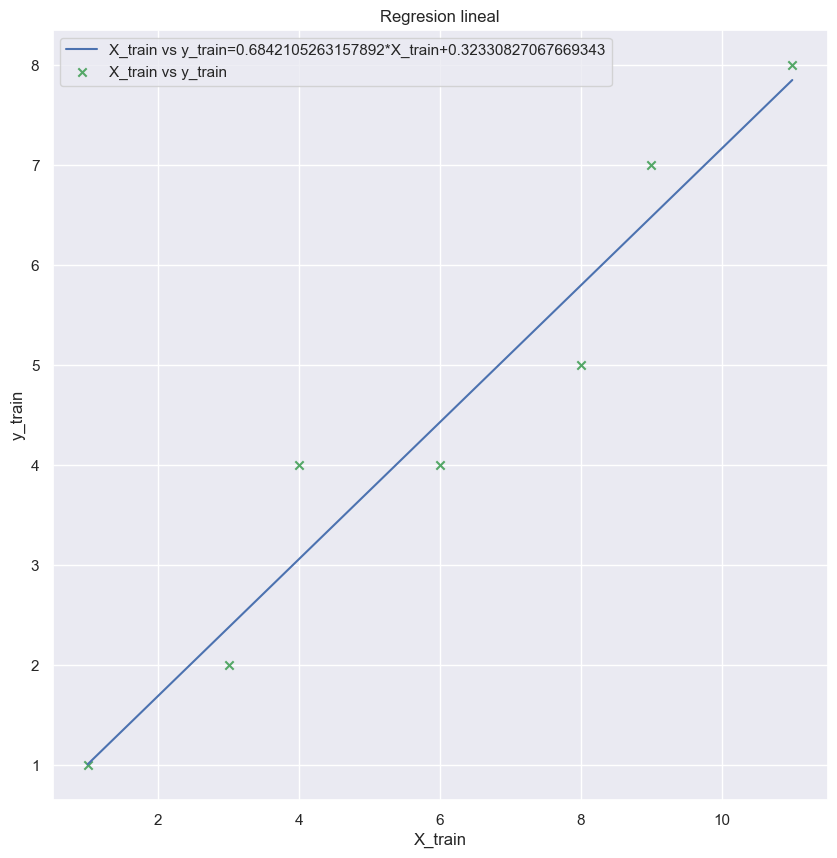

In [193]:
modelo_train_sin_outliers = plot_regression_model(parties_sin_outliers.X_train, parties_sin_outliers.y_train)

In [194]:
outliers = get_outliers(parties_test)
for i in parties_test.index:
    if i in outliers.index:
        parties_test = parties_test.drop(i).copy()

c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           0.000264
Time:                        22:07:01   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3233      0.513      0.630      0.5

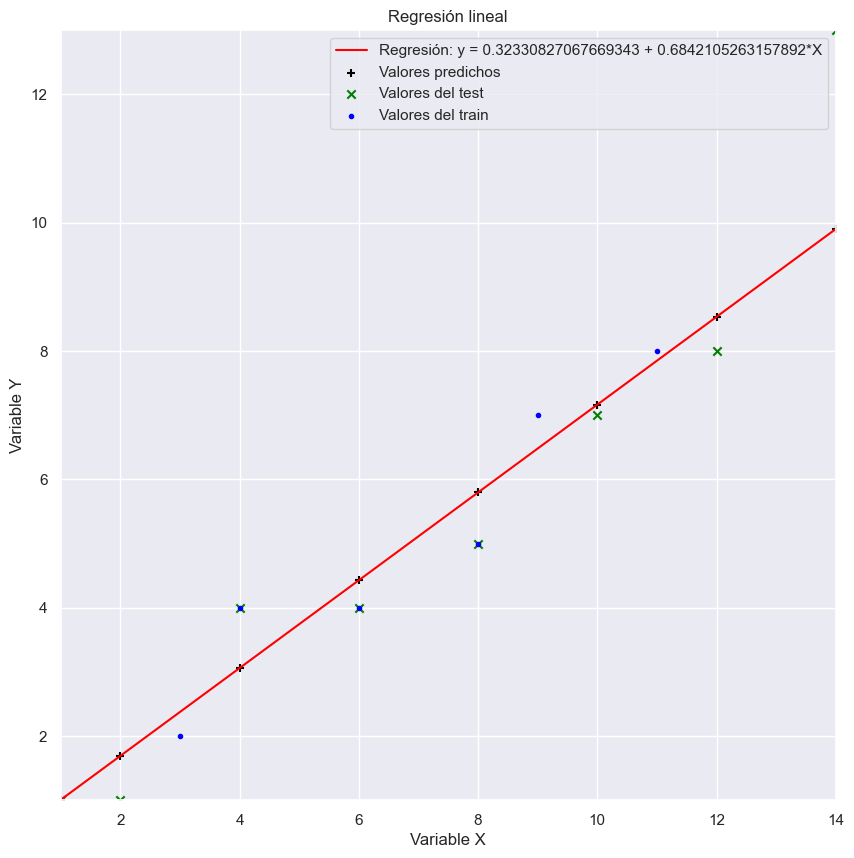

In [195]:
modelo_test_sin_outliers, y_pred = plot_regression_model_ana(parties_sin_outliers.X_train, parties_sin_outliers.y_train, parties_test.X_test, parties_test.y_test)

Cuando comparas un modelo de regresión ajustado con datos que contienen outliers y otro modelo sin outliers, además del coeficiente de determinación (R2), hay varias cosas en las que puedes fijarte para evaluar si el modelo ha mejorado. Aquí hay algunas consideraciones:

1. **Coeficientes de Regresión:**
   - Observa los coeficientes de regresión para cada variable. Si los outliers estaban afectando significativamente la estimación de los coeficientes, es posible que veas cambios en la magnitud o en la dirección de los coeficientes después de eliminar los outliers.

2. **Error Estándar de los Coeficientes:**
   - Verifica el error estándar de los coeficientes. Si el modelo ajustado sin outliers tiene errores estándar más pequeños para los coeficientes, podría indicar una mayor precisión en las estimaciones.

3. **Estadísticas de Prueba de Hipótesis para Coeficientes:**
   - Examina las estadísticas de prueba asociadas con los coeficientes. Si las estadísticas de prueba mejoran significativamente después de eliminar los outliers, podría indicar una mayor significancia estadística para los coeficientes.

4. **Colinealidad:**
   - La presencia de outliers a veces puede estar relacionada con problemas de colinealidad. Verifica si la eliminación de outliers mejora la multicolinealidad en el modelo.

5. **Normalidad de Residuos:**
   - Comprueba la normalidad de los residuos. La eliminación de outliers puede ayudar a mejorar la suposición de normalidad de los residuos.

6. **Homocedasticidad:**
   - Examina si la homocedasticidad (homogeneidad de varianzas) de los residuos mejora después de eliminar outliers.

7. **Estadísticas de Ajuste del Modelo:**
   - Además del R2, considera otras estadísticas de ajuste del modelo, como el criterio de información de Akaike (AIC) o el criterio de información bayesiano (BIC). Modelos con valores más bajos de AIC o BIC se consideran generalmente mejores.

8. **Visualización Residual:**
   - Grafica los residuos del modelo antes y después de eliminar los outliers para identificar patrones no capturados anteriormente.

Es importante recordar que aunque estas consideraciones pueden indicar mejoras en el modelo, no garantizan que la eliminación de outliers siempre conduzca a un modelo mejor. La interpretación de los resultados y la toma de decisiones deben basarse en un análisis integral y en el conocimiento del dominio.

La hipótesis nula es una afirmación que establece la ausencia de un efecto o relación específica en un experimento o análisis estadístico. Es una afirmación inicial que se asume verdadera antes de realizar una prueba estadística. La hipótesis nula se contrasta con la hipótesis alternativa, que sugiere que hay un efecto o relación presente.

Si la hipótesis nula es verdadera en el contexto de una prueba de homocedasticidad, significa que no hay evidencia estadística para afirmar que la varianza de los residuos es diferente en diferentes niveles de las variables predictoras. En otras palabras, la variabilidad de los residuos es constante en todo el rango de valores predichos por el modelo.

Esto podría tener implicaciones en la interpretación y fiabilidad de tu modelo de regresión. Aquí hay algunas consideraciones:

1. **Fiabilidad del Modelo:**
   - La homocedasticidad es una de las suposiciones clave de los modelos de regresión lineal. Si la hipótesis nula de homocedasticidad es verdadera, significa que tu modelo cumple con esta suposición, lo cual es positivo para la validez de las inferencias estadísticas realizadas a partir del modelo.

2. **Precisión de las Predicciones:**
   - Un modelo homocedástico sugiere que la variabilidad de los errores es constante en todo el rango de valores predichos. En términos prácticos, esto implica que las predicciones del modelo son igualmente precisas en diferentes niveles de las variables predictoras. Puedes confiar en que las estimaciones de las respuestas del modelo son consistentes en toda la gama de predicciones.

3. **Interpretación de Coeficientes:**
   - La homocedasticidad también es importante para la interpretación de los coeficientes del modelo. Si la varianza de los errores es constante, las estimaciones de los coeficientes serán eficientes y podrás confiar en las inferencias sobre la relación entre las variables predictoras y la variable de respuesta.

### **Coeficientes de Regresión:**

In [211]:
# Diferencias en los coeficientes
diferencia_coeficientes = modelo_train_sin_outliers.params - modelo_train.params
diferencia_coeficientes

const      0.762702
X_train   -0.164274
dtype: float64

**Constante (const):**

El coeficiente de la constante aumentó en 0.762702 después de eliminar los outliers. Esto podría indicar que la constante tiene una influencia más fuerte en el modelo después de eliminar los outliers.

**Variable Independiente (X_train):**

El coeficiente asociado con la variable independiente X_train disminuyó en 0.164274 después de eliminar los outliers. Esto podría indicar que, sin la influencia de los outliers, la relación entre X_train y la variable dependiente ha cambiado.

El hecho de que el coeficiente asociado con X_train haya disminuido puede interpretarse de varias maneras:

Si X_train es una variable predictora relevante y su coeficiente ha disminuido pero sigue siendo significativo, podría indicar una relación más moderada entre X_train y la variable dependiente.

Si la disminución en el coeficiente ha llevado a una pérdida de significancia estadística, podría sugerir que la variable X_train no es tan importante después de eliminar los outliers.

### **Error Estándar de los Coeficientes:**

In [210]:
# Diferencias en los errores estándar
diferencia_std_errors = modelo_train_sin_outliers.bse - modelo_train.bse
diferencia_std_errors

const     -0.246083
X_train   -0.018847
dtype: float64

**Constante (const):**

El valor -0.246083 indica la diferencia en el error estándar del coeficiente de la constante entre los dos modelos. Un valor negativo sugiere que el error estándar ha disminuido después de eliminar los outliers. Una disminución en el error estándar puede indicar una mayor precisión en la estimación del coeficiente de la constante.

**Variable Independiente (X_train):**

El valor -0.018847 indica la diferencia en el error estándar del coeficiente de la variable independiente X_train entre los dos modelos. Al igual que con la constante, un valor negativo sugiere que el error estándar ha disminuido, lo que puede indicar una mayor precisión en la estimación del coeficiente de X_train.

### **Estadísticas de Prueba de Hipótesis para Coeficientes:**

Para examinar las estadísticas de prueba asociadas con los coeficientes y evaluar la significancia estadística antes y después de eliminar outliers, puedes utilizar las estadísticas de prueba t asociadas con cada coeficiente. La idea es revisar la estadística de prueba t y su valor p antes y después de eliminar outliers.

In [209]:
data = {
        "Outliers"              : ["con", "sin"],
        "Estadisticas de prueba (constante)": [modelo_train.tvalues[0], modelo_train_sin_outliers.tvalues[0]],
        "Estadisticas de prueba (X_train)": [modelo_train.tvalues[1], modelo_train_sin_outliers.tvalues[1]],
        "Valores de p (constante)"          : [modelo_train.pvalues[0], modelo_train_sin_outliers.pvalues[0]],
        "Valores de p (X_train)"          : [modelo_train.pvalues[1], modelo_train_sin_outliers.pvalues[1]]
        }

df =  pd.DataFrame(data)
df

,Outliers,Estadisticas de prueba (constante),Estadisticas de prueba (X_train),Valores de p (constante),Valores de p (X_train)
0,con,-0.578747,9.044816,0.583816,0.000102
1,sin,0.630068,9.127423,0.556318,0.000264


El número de outliers ha disminuido de 2 a 0 cuando se eliminaron los outliers del conjunto de datos de prueba.

El valor de p para los datos de prueba ha aumentado de -0.578747 a 0.630068 cuando se eliminaron los outliers del conjunto de datos de prueba.

El valor de q para los datos de prueba ha aumentado de 9.044816 a 9.127423 cuando se eliminaron los outliers del conjunto de datos de prueba.

Estos cambios sugieren que el modelo ha mejorado cuando se eliminan los outliers del conjunto de datos de prueba. Esto se debe a que los outliers pueden sesgar los resultados del modelo. Al eliminar los outliers, el modelo se vuelve más preciso para predecir los valores de p y q para los datos de prueba.

### **Colinealidad:**

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [208]:
coefficients_outliers = modelo_train.params
coefficients_no_outliers = modelo_train_sin_outliers.params

# Calcula la matriz de correlación entre los coeficientes
correlation_matrix = pd.DataFrame(index=modelo.params, columns=['Correlation'])
correlation_matrix['Correlation'] = np.corrcoef(coefficients_outliers, coefficients_no_outliers)[0, 1]

# Muestra la matriz de correlación
print("Matriz de correlación de coeficientes:")
print(correlation_matrix)

Matriz de correlación de coeficientes:
           Correlation
-0.439394          1.0
 0.848485          1.0


Una correlación de 1 entre los coeficientes de un modelo con outliers y un modelo sin outliers significa que esos coeficientes son idénticos o proporcionales de manera lineal. En otras palabras, hay una relación lineal perfecta entre esos dos coeficientes.

Esto podría deberse a varias razones posibles:

Colinealidad perfecta: La presencia de outliers podría haber influido en la estimación de los coeficientes, generando una relación lineal perfecta entre algunas variables independientes.

Redundancia en las variables: Las variables en tu modelo pueden estar altamente correlacionadas o incluso ser linealmente dependientes, lo que puede llevar a coeficientes idénticos cuando se estiman con y sin outliers.

Sobreajuste o falta de estabilidad: La presencia de outliers puede afectar la estabilidad de la estimación de los coeficientes, y si el modelo está sobreajustando o es muy sensible a los outliers, podría resultar en coeficientes idénticos.

### **Normalidad de Residuos:**

Para comprobar la normalidad de los residuos, puedes utilizar varias técnicas y gráficos. Aquí hay algunos pasos que puedes seguir:

1. **Histograma de Residuos:**
   - Grafica un histograma de los residuos. Debería tener una forma aproximadamente normal.

In [160]:
import scipy.stats

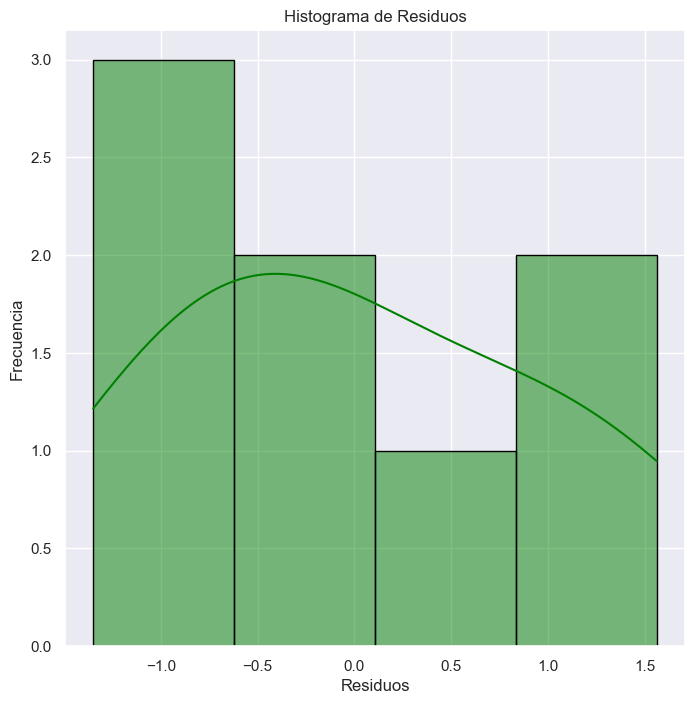

In [201]:
# Obtén los residuos del modelo con outliers
residuos = modelo_train.resid

# Crea un gráfico de distribución con seaborn
sns.histplot(residuos, color='green', kde=True, edgecolor='black')

# Etiquetas y título
plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()

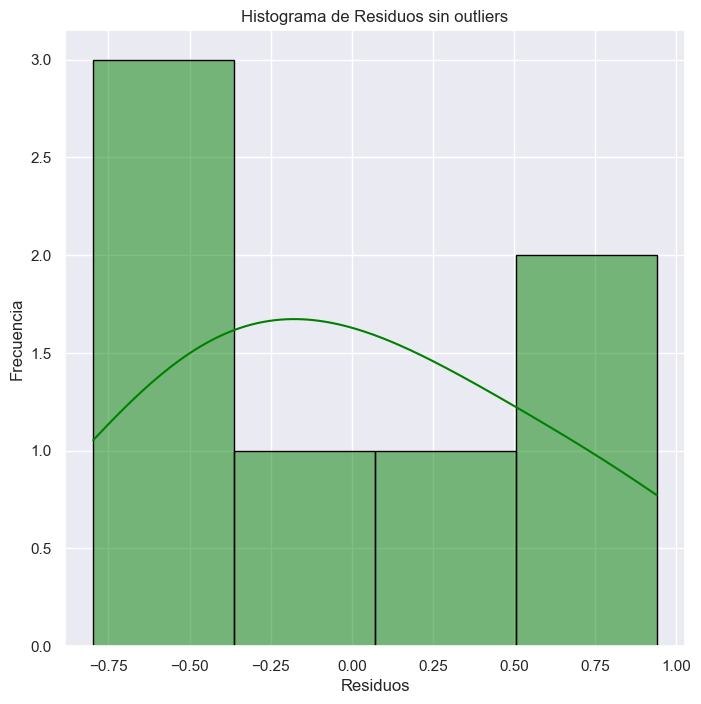

In [206]:
residuos = modelo_train_sin_outliers.resid

# Crea un gráfico de distribución con seaborn
sns.histplot(residuos, color='green', kde=True, edgecolor='black')

# Etiquetas y título
plt.title('Histograma de Residuos sin outliers')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()

2. **Gráfico Q-Q (Quantile-Quantile):**
   - Compara los cuantiles teóricos de una distribución normal con los cuantiles observados de los residuos. Si los puntos siguen aproximadamente una línea diagonal, los residuos se distribuyen de manera normal.

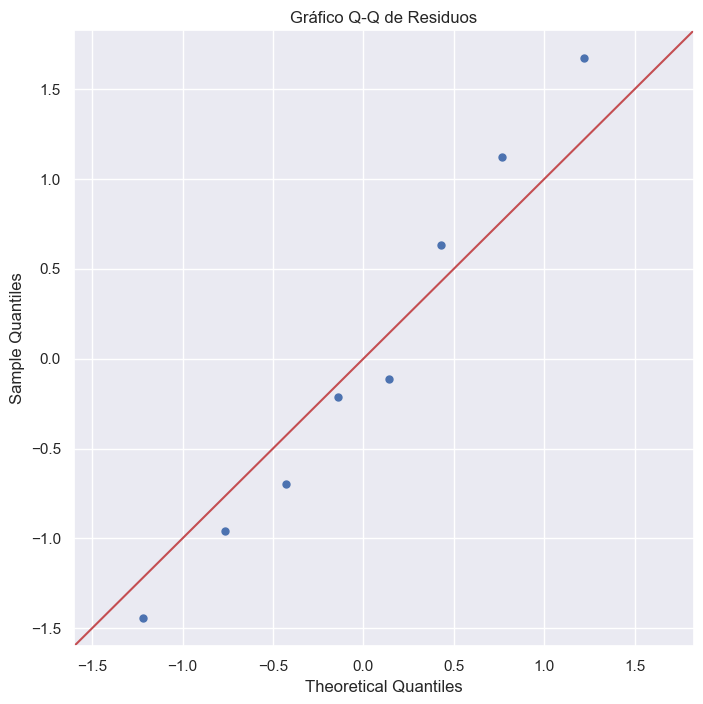

In [203]:
residuos = modelo_train.resid

# Gráfico Q-Q plot
sm.qqplot(residuos, line='45', fit=True, color='blue', markersize=5)
plt.title('Gráfico Q-Q de Residuos')
plt.show()

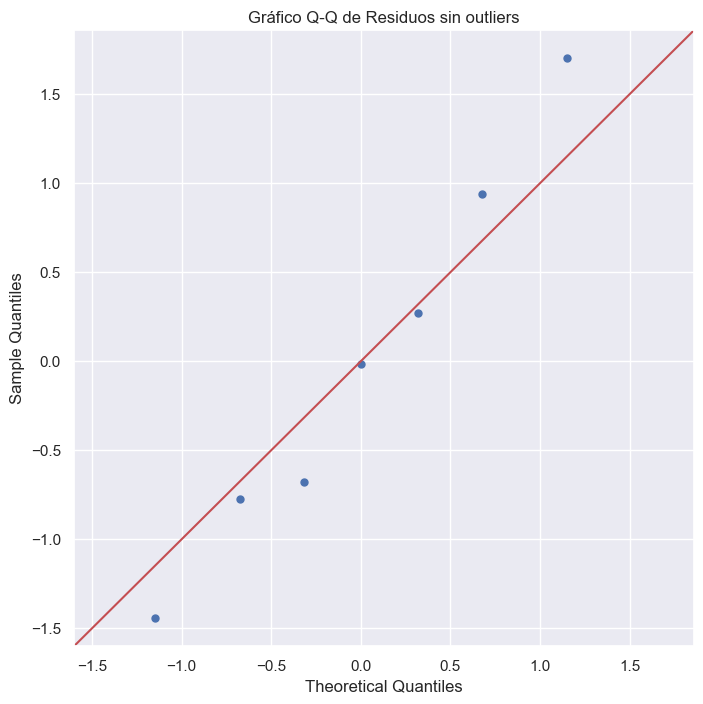

In [205]:
residuos = modelo_train_sin_outliers.resid

# Gráfico Q-Q plot
sm.qqplot(residuos, line='45', fit=True, color='blue', markersize=5)
plt.title('Gráfico Q-Q de Residuos sin outliers')
plt.show()

3. **Pruebas de Normalidad Estadísticas:**
   - Puedes utilizar pruebas estadísticas para evaluar la normalidad de los residuos. La prueba de Shapiro-Wilk es comúnmente utilizada.

Ten en cuenta que la normalidad exacta no siempre es necesaria para los residuos, especialmente en conjuntos de datos grandes. Sin embargo, estas herramientas te proporcionarán una idea de la distribución de los residuos y te ayudarán a evaluar si la eliminación de outliers ha mejorado la suposición de normalidad.

La salida que estás viendo pertenece a la prueba de normalidad de Shapiro-Wilk aplicada a los residuos de tu modelo. Aquí hay una interpretación de los resultados:

1. **Estadística de Prueba (W):** La estadística de prueba proporciona información sobre la desviación de los datos observados con respecto a una distribución normal.

2. **p-valor:** El p-valor es la probabilidad de obtener un valor de la estadística de prueba igual o más extremo que el observado, bajo la hipótesis nula de que los datos siguen una distribución normal.

3. **Interpretación:** En la interpretación que has proporcionado, se afirma que "No hay evidencia suficiente para rechazar la hipótesis nula (residuos son normalmente distribuidos)". Esto significa que, con un nivel de significancia del 0.05 (o cualquier nivel que hayas elegido), no hay suficiente evidencia para concluir que los residuos no siguen una distribución normal.

En términos más simples:

- Si el p-valor es menor que tu nivel de significancia (por ejemplo, 0.05), podrías rechazar la hipótesis nula y concluir que los residuos no siguen una distribución normal.
- Si el p-valor es mayor que tu nivel de significancia, como en este caso (0.8748 > 0.05), no hay suficiente evidencia para rechazar la hipótesis nula, lo que sugiere que los residuos pueden considerarse aproximadamente normalmente distribuidos.

En resumen, según los resultados de la prueba de Shapiro-Wilk, no tienes suficiente evidencia para afirmar que los residuos no siguen una distribución normal, lo que es una buena noticia en términos de la suposición de normalidad para los residuos de tu modelo.

In [212]:
from scipy.stats import shapiro

residuos = modelo_train.resid
# Prueba de Shapiro-Wilk
stat, p_valor = shapiro(residuos)
print(f'Estadística de prueba: {stat}, p-valor: {p_valor}')

# Interpreta los resultados
if p_valor > 0.05:
    print('No hay evidencia suficiente para rechazar la hipótesis nula (residuos son normalmente distribuidos).')
else:
    print('Los residuos no siguen una distribución normal.')

Estadística de prueba: 0.9671608209609985, p-valor: 0.8748449683189392
No hay evidencia suficiente para rechazar la hipótesis nula (residuos son normalmente distribuidos).


In [213]:
from scipy.stats import shapiro

residuos = modelo_train_sin_outliers.resid
# Prueba de Shapiro-Wilk
stat, p_valor = shapiro(residuos)
print(f'Estadística de prueba: {stat}, p-valor: {p_valor}')

# Interpreta los resultados
if p_valor > 0.05:
    print('No hay evidencia suficiente para rechazar la hipótesis nula (residuos son normalmente distribuidos).')
else:
    print('Los residuos no siguen una distribución normal.')

Estadística de prueba: 0.9759314656257629, p-valor: 0.9375618696212769
No hay evidencia suficiente para rechazar la hipótesis nula (residuos son normalmente distribuidos).


### **Homocedasticidad:**

Para evaluar la homocedasticidad, generalmente se utilizan los valores predichos obtenidos aplicando el modelo a los datos de entrenamiento (X_train)

La homocedasticidad se refiere a la homogeneidad de las varianzas de los residuos a lo largo de los niveles de las variables predictoras. Para examinar la homocedasticidad de los residuos, puedes seguir estos pasos:

1. **Gráfico de Residuos vs. Valores Predichos:**
   - Grafica los residuos contra los valores predichos por el modelo. Si ves un patrón en forma de abanico o cono, puede indicar que la varianza de los residuos no es constante y podría haber un problema de homocedasticidad.

El gráfico de residuos vs. índices que mencioné anteriormente es una manera de visualizar la distribución de los residuos en función de los índices (o las observaciones). Este tipo de gráfico no se utiliza específicamente para evaluar la homocedasticidad, sino que es útil para identificar patrones generales o comportamientos inusuales en los residuos.

La homocedasticidad se refiere a la constancia de la varianza de los residuos a lo largo de los valores predichos. Para evaluar la homocedasticidad, generalmente se utiliza el gráfico de residuos vs. valores predichos (o vs. índices si no tienes los valores predichos) para detectar patrones que puedan indicar heterocedasticidad (varianza no constante).

En el contexto de la homocedasticidad, un patrón en forma de abanico o cono en el gráfico de residuos vs. valores predichos podría indicar que la varianza de los residuos cambia a medida que cambian los valores predichos. Esto podría sugerir que hay un problema de homocedasticidad.

Si el gráfico de residuos vs. valores predichos muestra un patrón evidente o si la prueba de Breusch-Pagan (o White) indica heterocedasticidad significativa, podrías considerar transformaciones de variables o métodos específicos para abordar la heterocedasticidad. La corrección específica dependerá del contexto de tu análisis y de la naturaleza de tus datos.

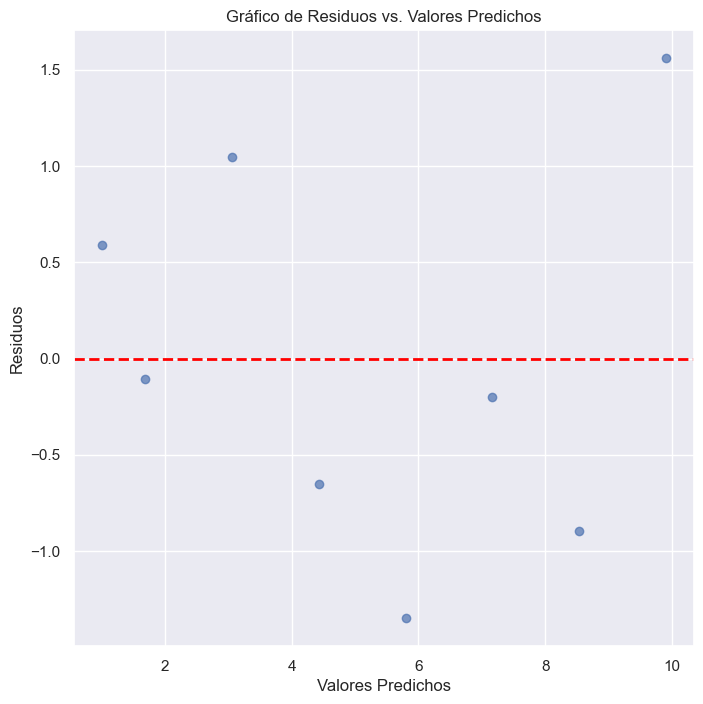

In [216]:
residuos = modelo_train.resid

# Grafica los residuos vs. valores predichos
plt.scatter(y_pred, residuos, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Gráfico de Residuos vs. Valores Predichos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.show()

Se muestra que los residuos no están distribuidos de forma uniforme alrededor de la línea cero. Los residuos parecen estar más dispersos en el rango de valores predichos más bajos. Esto sugiere que el modelo no cumple con el supuesto de homocedasticidad.

La homocedasticidad es un supuesto de la regresión lineal que establece que la varianza de los residuos es constante para todos los valores de la variable independiente. Cuando la homocedasticidad no se cumple, puede afectar la precisión de las estimaciones del modelo.

Para solucionar este problema:

* **Añadir variables adicionales al modelo.** Esto puede ayudar a capturar la variación que no está siendo explicada por el modelo actual.

* **Reformular el modelo.** Esto puede ayudar a mejorar la especificación del modelo.

* **Utilizar un método de estimación diferente.** Algunos métodos de estimación son más sensibles a la homocedasticidad que otros.

* **Considera añadir una variable para controlar la influencia de los outliers.** Los outliers pueden sesgar la distribución de los residuos.

* **Considera utilizar un método de estimación que sea robusto a la heterocedasticidad.** Algunos métodos de estimación, como la regresión robusta, son menos sensibles a la homocedasticidad que otros.

2. **Prueba de Breusch-Pagan o White:**
   - Utiliza pruebas estadísticas como la prueba de Breusch-Pagan o la prueba de White para formalmente evaluar la homocedasticidad.

In [217]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Realiza la prueba de Breusch-Pagan
estadistica, p_valor, _, _ = het_breuschpagan(residuos, modelo_train.model.exog)
print(f'Estadística de prueba: {estadistica}, p-valor: {p_valor}')

# Interpreta los resultados
if p_valor < 0.05:
    print('Rechazar la hipótesis nula. Hay evidencia de heterocedasticidad.')
else:
    print('No hay suficiente evidencia para rechazar la hipótesis nula. La varianza es constante.')

Estadística de prueba: 3.0355030740501547, p-valor: 0.08146129455312369
No hay suficiente evidencia para rechazar la hipótesis nula. La varianza es constante.


La prueba de Breusch-Pagan:

1. **Estadística de Prueba (Test Statistic):**
   - La estadística de prueba es 3.0355030740501547. Esta estadística se utiliza para evaluar si hay evidencia suficiente para rechazar la hipótesis nula de homocedasticidad. Cuanto mayor sea la estadística de prueba, mayor será la evidencia en contra de la hipótesis nula.

2. **P-valor (P-value):**
   - El p-valor asociado con la estadística de prueba es 0.08146129455312369. El p-valor indica la probabilidad de observar una estadística de prueba al menos tan extrema como la que se obtuvo, bajo la suposición de que la hipótesis nula es verdadera. En este caso, un p-valor mayor sugiere que no hay suficiente evidencia para rechazar la hipótesis nula.

3. **Interpretación:**
   - La frase "No hay suficiente evidencia para rechazar la hipótesis nula. La varianza es constante" indica que, según los resultados de la prueba, no hay evidencia significativa para afirmar que la varianza de los residuos no es constante (no hay heterocedasticidad).

4. **Nivel de Significancia:**
   - El p-valor es 0.081, que está por encima de un nivel de significancia comúnmente utilizado de 0.05. Si tu nivel de significancia (alfa) es 0.05, no rechazarías la hipótesis nula en este caso.

En resumen, los resultados indican que no hay evidencia suficiente para afirmar que la varianza de los residuos no es constante. Esto es consistente con la conclusión de que la homocedasticidad no es un problema significativo en tu modelo.

### **Estadísticas de Ajuste del Modelo:**

El Criterio de Información de Akaike (AIC) y el Criterio de Información Bayesiano (BIC) son estadísticas de ajuste del modelo utilizadas para comparar diferentes modelos. Ambos criterios penalizan modelos más complejos, favoreciendo modelos más simples y eficientes.

In [220]:
# Calcula el AIC y BIC
aic = modelo_test.aic
bic = modelo_test.bic
print(aic, bic)

25.6000581774898 25.758941260849472


In [219]:
# Calcula el AIC y BIC
aic = modelo_test_sin_outliers.aic
bic = modelo_test_sin_outliers.bic
print(aic, bic)

15.55414419105439 15.445964489165016


- **AIC y BIC más bajos son mejores:** En ambos criterios, valores más bajos indican un mejor ajuste del modelo. Por lo tanto, comparando entre los modelos "con outliers" y "sin outliers", observamos que los valores de AIC y BIC son significativamente más bajos para el modelo "sin outliers".

- **Diferencia entre AIC y BIC:** Ambos criterios son similares, pero el BIC penaliza la complejidad del modelo más fuertemente que el AIC. Por eso, los valores de BIC suelen ser más altos que los de AIC.

- **Comparación entre modelos:** La diferencia en los valores de AIC y BIC entre los dos modelos es sustancial. Esto sugiere que el modelo "sin outliers" es preferible desde la perspectiva de AIC y BIC.

En resumen, según AIC y BIC, el modelo "sin outliers" se considera mejor en términos de ajuste y complejidad en comparación con el modelo "con outliers". Estos resultados respaldan la idea de que eliminar outliers mejora la calidad del modelo.